In [1]:
import classes
parameters = classes.Empty()
start_position = classes.PosAndTime()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Параметры модели:
parameters.lmbda = 1    # Целевая средняя длина свободного пробега
parameters.velocity = 1 # Скорость (одинаковая для всех частиц и всех моментов времени)

start_guide_cosines = classes.GuideCosines \
        (a=0, b=0, c=0) # Направляющие косинусы при t = 0

time_limit = 100        # Время моделирования в единицах лямбда / v 

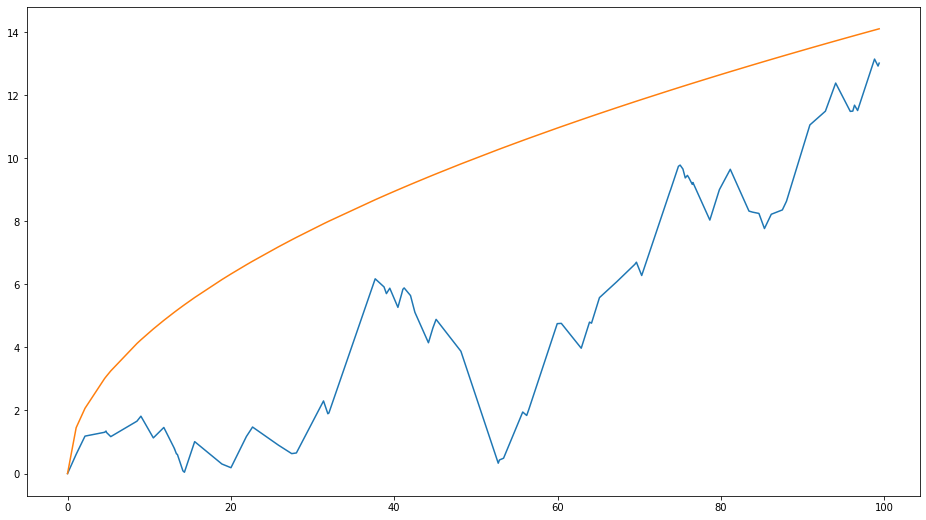

In [3]:
import cycles
one_particle_path = cycles.simulate_one_particle(parameters, start_position, start_guide_cosines, time_limit)
#one_particle_path :: [{x, y, z, t}]

distances = list(map(lambda obj : obj.distance(), one_particle_path))
times     = list(map(lambda obj : obj.t,          one_particle_path))

import theory
theory.setParameters(parameters)
predictions = list(map(theory.distance, times))

from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(times, distances, times, predictions)

In [4]:
Nparticles = 500

In [5]:
arar = cycles.simulate_multiple_particles(parameters, Nparticles, start_position, start_guide_cosines, time_limit)

In [6]:
tar, mar = cycles.meanDistance(arar, time_limit)

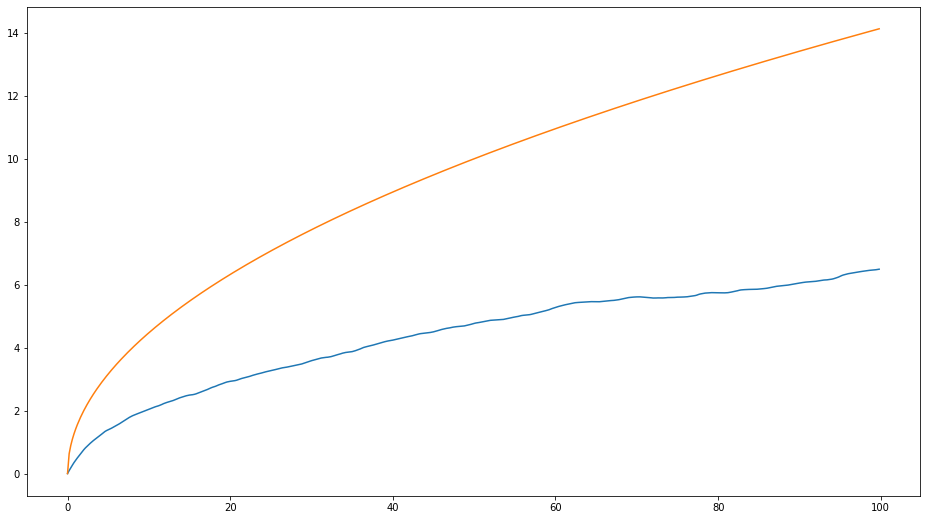

In [7]:
predictions = list(map(theory.distance, tar))

plt.figure(figsize=(16,9))
plt.plot(tar, mar, tar, predictions)

In [8]:
mar[99] / predictions[99]

0.4640390205841191

In [9]:
predictions[99] / mar[99]

2.154991187467874

In [10]:
mar[99] * 9 / 4 - predictions[99]

0.2774380252243658